In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [3]:
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv")
df.head()

,Unnamed: 0,\q95,time,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_EDGE16:EDGE16_NE,\TS_EDGE17:EDGE17_NE,shot
0,0,9.503320,0.15,-97237.617188,1.021017,-0.001387,0.017653,-0.863323,-0.248114,14.589464,...,1.149400e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
1,1,9.745522,0.20,-123203.875000,1.064507,-0.023950,0.042690,-0.465635,-0.017974,12.083524,...,1.287133e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
2,2,9.987725,0.25,-149170.156250,1.107996,-0.046512,0.067726,-0.067947,0.212166,9.577585,...,1.389168e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
3,3,10.229928,0.30,-175136.406250,1.151485,-0.069075,0.092763,0.329740,0.442306,7.071646,...,1.494251e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
4,4,10.472131,0.35,-201102.687500,1.194974,-0.091638,0.117800,0.727428,0.672446,4.565707,...,1.766279e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074


In [4]:
shot_list = np.unique(df.shot.values).tolist()
shot = shot_list[-100]
df_shot = df[df.shot == shot]

In [5]:
df_shot

,Unnamed: 0,\q95,time,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_EDGE16:EDGE16_NE,\TS_EDGE17:EDGE17_NE,shot
137560,2197,622.626648,0.360000,-217551.093750,1.101307,0.020508,0.020508,0.989680,0.909285,0.417497,...,6.268559e+17,4.325701e+17,0.0,0.0,2.686741e+17,NaN,NaN,NaN,NaN,21231
137561,2198,482.355713,0.410000,-240739.546875,1.131800,0.039247,0.039247,0.964488,0.927428,0.442281,...,3.441471e+17,2.591170e+17,0.0,0.0,1.014380e+19,NaN,NaN,NaN,NaN,21231
137562,2199,342.084869,0.460000,-263928.000000,1.162293,0.057985,0.057985,0.939295,0.945570,0.467065,...,1.941061e+17,4.311611e+17,0.0,0.0,1.305075e+19,NaN,NaN,NaN,NaN,21231
137563,2200,201.813980,0.510000,-287116.437500,1.192786,0.076724,0.076724,0.914102,0.963713,0.491848,...,4.043010e+17,1.179193e+17,0.0,0.0,1.629494e+19,NaN,NaN,NaN,NaN,21231
137564,2201,61.543068,0.560000,-310304.875000,1.223279,0.095463,0.095463,0.888910,0.981856,0.516632,...,1.155697e+18,6.981225e+16,0.0,0.0,1.950370e+18,NaN,NaN,NaN,NaN,21231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137712,2349,5.716003,7.959998,-483839.093750,2.039504,0.693356,0.188766,1.047032,1.052390,1.073518,...,7.143154e+17,6.174477e+17,0.0,0.0,7.846299e+17,NaN,NaN,NaN,NaN,21231
137713,2350,5.716003,8.009997,-483839.093750,2.039504,0.693356,0.188766,1.047032,1.052390,1.073518,...,7.143154e+17,6.174477e+17,0.0,0.0,7.846299e+17,NaN,NaN,NaN,NaN,21231
137714,2351,5.716003,8.059998,-483839.093750,2.039504,0.693356,0.188766,1.047032,1.052390,1.073518,...,7.143154e+17,6.174477e+17,0.0,0.0,7.846299e+17,NaN,NaN,NaN,NaN,21231
137715,2352,5.716003,8.109997,-483839.093750,2.039504,0.693356,0.188766,1.047032,1.052390,1.073518,...,7.143154e+17,6.174477e+17,0.0,0.0,7.846299e+17,NaN,NaN,NaN,NaN,21231


In [4]:
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv')
video_shot_list = np.unique(kstar_shot_list.shot.values).tolist()

In [5]:
kstar_shot_list

tTQend = kstar_shot_list[kstar_shot_list.shot == shot].tTQend.values
tftsrt = kstar_shot_list[kstar_shot_list.shot == shot].tftsrt.values
tipminf = kstar_shot_list[kstar_shot_list.shot == shot].tipminf.values

In [6]:
print("numerical variables : ", len(shot_list))
print("video shot list : ", len(video_shot_list))

numerical variables :  969
video shot list :  1096


In [7]:
df_shot = df_shot.dropna(axis = 1)

In [8]:
t = df_shot.time
ip = df_shot['\\ipmhd']
kappa = df_shot['\\kappa']
betap = df_shot['\\betap']
betan = df_shot['\\betan']
li = df_shot['\\li']
Bc = df_shot['\\bcentr']
q95 = df_shot['\\q95']
tritop = df_shot['\\tritop']
tribot = df_shot['\\tribot']
W_tot = df_shot['\\WTOT_DLM03']

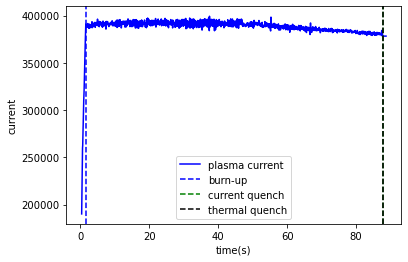

In [9]:
import matplotlib.pyplot as plt

plt.plot(t, -ip, 'b', label = 'plasma current')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('current')
plt.legend()
plt.show()

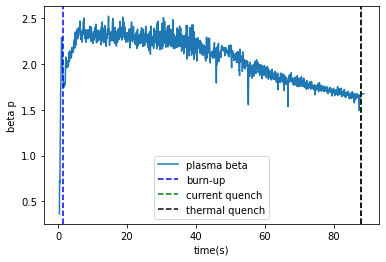

In [10]:
import matplotlib.pyplot as plt

plt.plot(t, betap, label = 'plasma beta')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta p')
plt.legend()
plt.show()

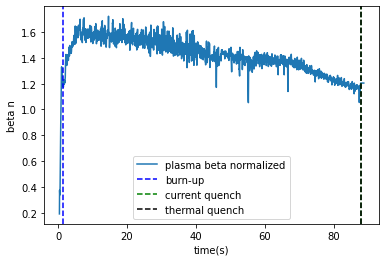

In [11]:
plt.plot(t, betan, label = 'plasma beta normalized')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta n')
plt.legend()
plt.show()

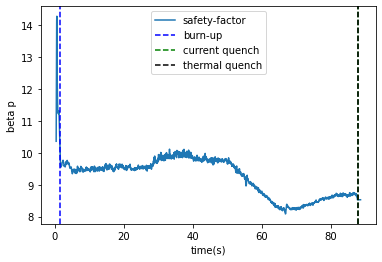

In [12]:
plt.plot(t, q95, label = 'safety-factor')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta p')
plt.legend()
plt.show()

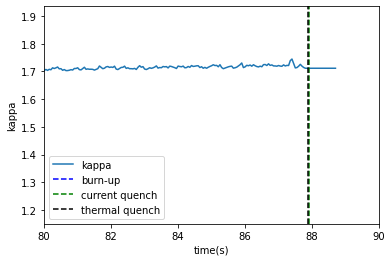

In [13]:
plt.plot(t, kappa, label = 'kappa')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('kappa')
plt.xlim([80,90])
plt.legend()
plt.show()

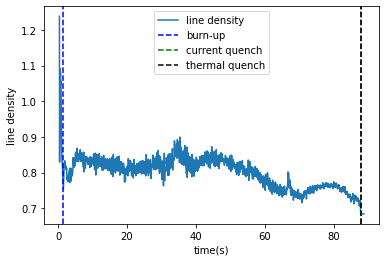

In [14]:
plt.plot(t, li, label = 'line density')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('line density')
plt.legend()
plt.show()

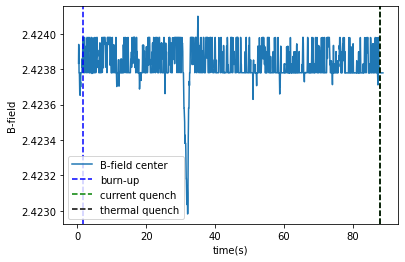

In [15]:
plt.plot(t, -Bc, label = 'B-field center')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('B-field')
plt.legend()
plt.show()

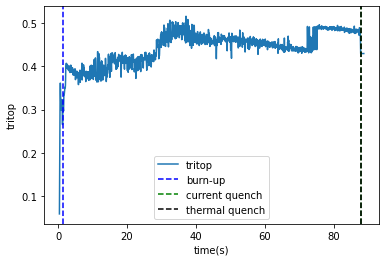

In [16]:
plt.plot(t, tritop, label = 'tritop')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('tritop')
plt.legend()
plt.show()

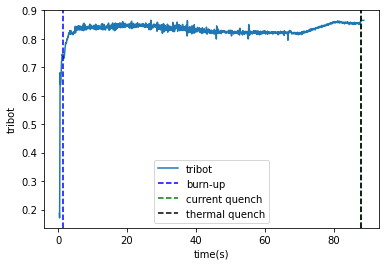

In [17]:
plt.plot(t, tribot, label = 'tribot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('tribot')
plt.legend()
plt.show()

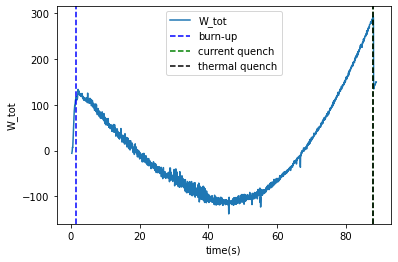

In [18]:
plt.plot(t, W_tot, label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

In [19]:
ts_te_core_cols = df_shot.columns.tolist()[18:32]
ts_te_edge_cols = df_shot.columns.tolist()[32:44]
ts_ne_core_cols = df_shot.columns.tolist()[44:58]
ts_ne_edge_cols = df_shot.columns.tolist()[58:68]

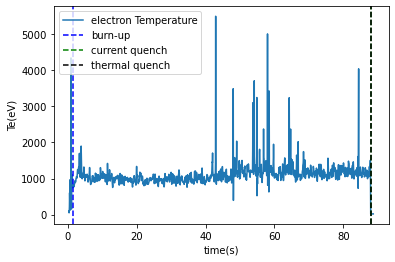

In [20]:
te_core = df_shot[ts_te_core_cols[-1]]
plt.plot(t, te_core, label = 'electron Temperature')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('Te(eV)')
plt.legend()
plt.show()

In [21]:
# interpolation
import scipy as sp
from scipy.interpolate import interp1d

cols = ['\\betap', '\\betan']
t = df_shot['time'].values.reshape(-1,)
data = df_shot[cols[0]].values
interp = interp1d(t, data)

t_extend = np.arange(min(t), max(t), 1.0 / 210)
data_extend = interp(t_extend)
data_extend

array([0.36250281, 0.39712224, 0.43174166, ..., 1.67598939, 1.67598939,
       1.67598939])

In [18]:
import pandas as pd
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv")
df_extend.head()

,Unnamed: 0,time,shot,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,...,\TS_EDGE7:EDGE7_NE,\TS_EDGE8:EDGE8_NE,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,frame_idx
0,0,0.000000,13074,8.776711,-19338.836011,0.890549,0.066302,-0.057457,-2.056386,-0.938534,...,3.874255e+18,4.029587e+17,7.362033e+18,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.004762,13074,8.799778,-21811.813093,0.894691,0.064153,-0.055073,-2.018511,-0.916616,...,3.967363e+18,4.579564e+17,7.493206e+18,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,0.009524,13074,8.822845,-24284.790175,0.898833,0.062004,-0.052688,-1.980636,-0.894698,...,4.060471e+18,5.129541e+17,7.624380e+18,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,0.014286,13074,8.845912,-26757.767257,0.902975,0.059855,-0.050304,-1.942761,-0.872780,...,4.153579e+18,5.679518e+17,7.755553e+18,0.0,0.0,0.0,0.0,0.0,0.0,3
4,4,0.019048,13074,8.868979,-29230.744339,0.907117,0.057706,-0.047919,-1.904886,-0.850862,...,4.246686e+18,6.229495e+17,7.886727e+18,0.0,0.0,0.0,0.0,0.0,0.0,4


In [23]:
df_shot = df_extend[df_extend.shot == shot]
df_shot[df_shot.frame_idx == 10].index.item()

1823141

In [22]:
df_shot = df_extend[df_extend.shot == shot]

t = df_shot.time
ip = df_shot['\\ipmhd']
kappa = df_shot['\\kappa']
betap = df_shot['\\betap']
betan = df_shot['\\betan']
li = df_shot['\\li']
Bc = df_shot['\\bcentr']
q95 = df_shot['\\q95']
tritop = df_shot['\\tritop']
tribot = df_shot['\\tribot']
W_tot = df_shot['\\WTOT_DLM03']

In [26]:
fps = 210
df_shot['frame'] = df_shot.time.apply(lambda x : int(round(x * fps)))

/tmp/ipykernel_18820/1419833678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['frame'] = df_shot.time.apply(lambda x : int(round(x * fps)))


In [27]:
df_shot.head()

,Unnamed: 0,time,shot,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,...,\TS_EDGE7:EDGE7_NE,\TS_EDGE8:EDGE8_NE,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,frame
1823131,0,0.000000,21757,1.685927,-80779.559194,0.420567,-0.442852,0.295993,-2.182025,-1.093719,...,4.804316e+18,0.0,-2.139791e+18,4.177611e+18,0.0,0.0,0.0,NaN,NaN,0
1823132,1,0.004762,21757,1.803951,-82267.871339,0.430980,-0.436014,0.294498,-2.147405,-1.076249,...,4.753662e+18,0.0,-2.108971e+18,4.137899e+18,0.0,0.0,0.0,NaN,NaN,1
1823133,2,0.009524,21757,1.921976,-83756.183484,0.441392,-0.429176,0.293003,-2.112786,-1.058778,...,4.703008e+18,0.0,-2.078152e+18,4.098187e+18,0.0,0.0,0.0,NaN,NaN,2
1823134,3,0.014286,21757,2.040000,-85244.495629,0.451805,-0.422338,0.291508,-2.078167,-1.041307,...,4.652354e+18,0.0,-2.047332e+18,4.058475e+18,0.0,0.0,0.0,NaN,NaN,3
1823135,4,0.019048,21757,2.158024,-86732.807774,0.462218,-0.415500,0.290013,-2.043547,-1.023837,...,4.601700e+18,0.0,-2.016512e+18,4.018763e+18,0.0,0.0,0.0,NaN,NaN,4


In [25]:
0.004762 * 210

1.00002

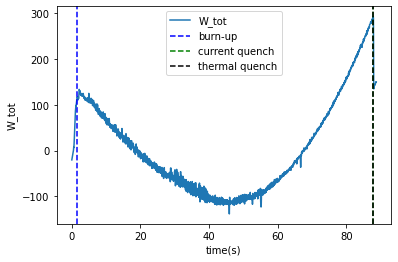

In [24]:
plt.plot(t, W_tot, label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

In [10]:
# df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv")
import numpy as np
import torch
import torch.nn as nn

ts_cols = [
    '\\q95', '\\ipmhd', '\\kappa', 
    '\\tritop', '\\tribot','\\betap','\\betan',
    '\\li', '\\ne_inter01', '\\WTOT_DLM03'
]

for col in ts_cols:
    df_extend[col] = df_extend[col].astype(np.float32)

# disruption info
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv')

# shot list
shot_list = np.unique(df_extend.shot.values).tolist()

from typing import Optional, List
from tqdm.auto import tqdm

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, ts_data : pd.DataFrame, disrupt_data : pd.DataFrame, seq_len : int, cols : List, dist:int):
        self.ts_data = ts_data
        self.disrupt_data = disrupt_data
        self.seq_len = seq_len
        self.cols = cols
        self.dist = dist # distance

        self.indices = []
        self.labels = []

        self._generate_index()

    def _generate_index(self):
        shot_list = np.unique(self.ts_data.shot.values).tolist()
        df_disruption = self.disrupt_data

        for shot in tqdm(shot_list):
            tTQend = df_disruption[df_disruption.shot == shot].tTQend.values[0]
            tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values[0]
            tipminf = df_disruption[df_disruption.shot == shot].tipminf.values[0]

            df_shot = self.ts_data[self.ts_data.shot == shot]
            indices = []
            labels = []

            idx = 0
            idx_last = len(df_shot.index) - self.seq_len - self.dist

            while(idx < idx_last):
                row = df_shot.iloc[idx]
                t = row['time']

                if idx_last - idx - self.seq_len - self.dist < 0:
                    break

                if t >= tftsrt and t < tTQend - 1.0 / 210 * (self.seq_len + self.dist):
                    indices.append(idx)
                    labels.append(0)
                    idx += self.seq_len

                elif t > tTQend - 1.0 / 210 * (self.seq_len + self.dist):
                    indices.append(idx)
                    labels.append(1)
                    # idx += 1
                    idx += self.seq_len
                
                elif t < tftsrt:
                    idx += self.seq_len

            self.indices.extend(indices)
            self.labels.extend(labels)

    def __getitem__(self, idx:int):
        indx = self.indices[idx]
        label = self.labels[idx]
        label = np.array(label)
        label = torch.from_numpy(label)
        data = self.ts_data[self.cols].iloc[indx:indx+self.seq_len].values
        data = torch.from_numpy(data)
        return data, label

    def __len__(self):
        return len(self.indices)

from sklearn.model_selection import train_test_split
ts_train = df_extend
train_data = CustomDataset(ts_train, kstar_shot_list, seq_len = 42, cols = ts_cols, dist = 0)

from torch.utils.data import DataLoader
batch_size = 256
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 4)

sample_data, sample_target = next(iter(train_loader))
print("sample_data : ", sample_data.size())
print("sample_target : ", sample_target.size())

  0%|          | 0/969 [00:00<?, ?it/s]

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

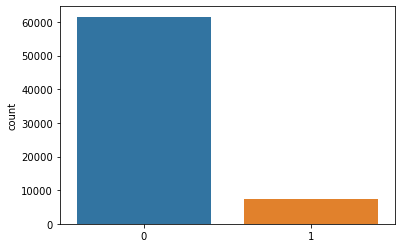

In [ ]:
import seaborn as sns
sns.countplot(train_data.labels)

In [8]:
from typing import Optional, List, Tuple
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
from pytorch_model_summary import summary

class PositionalEncoding(nn.Module):
    def __init__(self, d_model : int, max_len : int = 128):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        self.max_len = max_len

        pe = torch.zeros(max_len, d_model).float()
        position = torch.arange(0, max_len).float().unsqueeze(1) # (max_len, 1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp() # (d_model // 2, )

        pe[:,0::2] = torch.sin(position * div_term)

        if d_model % 2 != 0:
            pe[:,1::2] = torch.cos(position * div_term)[:,0:-1]
        else:
            pe[:,1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0).transpose(0,1) # shape : (max_len, 1, d_model)

        self.register_buffer('pe', pe)

    def forward(self, x:torch.Tensor)->torch.Tensor:
        # x : (seq_len, batch_size, n_features)
        return x + self.pe[:x.size(0), :, :]

class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))

class TStransformer(nn.Module):
    def __init__(self, n_features : int = 11, feature_dims : int = 256, max_len : int = 128, n_layers : int = 1, n_heads : int = 8, dim_feedforward : int = 1024, dropout : float = 0.1, cls_dims : int = 128, n_classes : int = 2):
        super(TStransformer, self).__init__()
        self.src_mask = None
        self.n_features = n_features
        self.max_len = max_len
        self.encoder_input_layer = nn.Linear(in_features = n_features, out_features = feature_dims)
        self.pos_enc = PositionalEncoding(d_model = feature_dims, max_len = max_len)
        self.encoder = nn.TransformerEncoderLayer(
            d_model = feature_dims, 
            nhead = n_heads, 
            dropout = dropout,
            dim_feedforward = dim_feedforward,
            activation = GELU()
        )
        self.transformer_encoder = nn.TransformerEncoder(self.encoder, num_layers=n_layers)
        self.classifier = nn.Sequential(
            nn.Linear(feature_dims, cls_dims),
            nn.BatchNorm1d(cls_dims),
            GELU(),
            nn.Linear(cls_dims, n_classes)
        )


    def forward(self, x : torch.Tensor)->torch.Tensor:
        x = self.encoder_input_layer(x)
        x = x.permute(1,0,2)
        if self.src_mask is None or self.src_mask.size(0) != len(x):
            device = x.device
            mask = self._generate_square_subsequent_mask(len(x)).to(device)
            self.src_mask = mask
        
        x = self.pos_enc(x)
        x = self.transformer_encoder(x, self.src_mask.to(x.device)).permute(1,0,2).mean(dim = 1) # (seq_len, batch, feature_dims)
        x = self.classifier(x)
        return x

    def _generate_square_subsequent_mask(self, size : int)->torch.Tensor:
        mask = (torch.triu(torch.ones(size,size))==1).transpose(0,1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def summary(self)->None:
        sample_x = torch.zeros((2, self.max_len, self.n_features))
        summary(self, sample_x, batch_size = 2, show_input = True, print_summary=True)

model = TStransformer(
    n_features=len(ts_cols),
    feature_dims = 16,
    max_len = 42, 
    n_layers = 4,
    n_heads = 4, 
    dim_feedforward = 1024,
    dropout = 0.5, 
    cls_dims = 128, 
    n_classes  = 2
)

model.summary()

sample_data, sample_target = next(iter(train_loader))
print("sample_data : ", sample_data.size())
print("sample_target : ", sample_target.size())

sample_output = model(sample_data)
print("sample_output : ", sample_output.size())

----------------------------------------------------------------------------------
           Layer (type)               Input Shape         Param #     Tr. Param #
               Linear-1               [2, 21, 10]             176             176
   PositionalEncoding-2               [21, 2, 16]               0               0
   TransformerEncoder-3     [21, 2, 16], [21, 21]          69,920          69,920
               Linear-4                   [2, 16]           2,176           2,176
          BatchNorm1d-5                  [2, 128]             256             256
                 GELU-6                  [2, 128]               0               0
               Linear-7                  [2, 128]             258             258
Total params: 72,786
Trainable params: 72,786
Non-trainable params: 0
Batch size: 2
----------------------------------------------------------------------------------
sample_data :  torch.Size([32, 21, 10])
sample_target :  torch.Size([32])
sample_output :  tor

In [9]:
import torch
import torch.nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def train_per_epoch(
    data_loader : torch.utils.data.DataLoader,
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    scheduler : Optional[torch.optim.lr_scheduler._LRScheduler],
    loss_fn : torch.nn.Module,
    device : str = "cpu",
    max_norm_grad : Optional[float] = None
    ):

    model.train()
    model.to(device)

    train_loss = 0
    train_acc = 0

    total_pred = np.array([])
    total_label = np.array([])

    for batch_idx, (data, target) in enumerate(data_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()

        # use gradient clipping
        if max_norm_grad:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm_grad)

        optimizer.step()

        train_loss += loss.item()

        pred = torch.nn.functional.softmax(output, dim = 1).max(1, keepdim = True)[1]
        train_acc += pred.eq(target.view_as(pred)).sum().item() / data.size(0) 
    
        total_pred = np.concatenate((total_pred, pred.cpu().numpy().reshape(-1,)))
        total_label = np.concatenate((total_label, target.cpu().numpy().reshape(-1,)))
        
    if scheduler:
        scheduler.step()

    train_loss /= (batch_idx + 1)
    train_acc /= (batch_idx + 1)

    train_f1 = f1_score(total_label, total_pred, average = "macro")

    return train_loss, train_acc, train_f1


def valid_per_epoch(
    data_loader : torch.utils.data.DataLoader,
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    loss_fn : torch.nn.Module,
    device : str = "cpu",
    ):

    model.eval()
    model.to(device)

    valid_loss = 0
    valid_acc = 0

    total_pred = np.array([])
    total_label = np.array([])

    for batch_idx, (data, target) in enumerate(data_loader):
        with torch.no_grad():
            optimizer.zero_grad()
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            valid_loss += loss.item()

            pred = torch.nn.functional.softmax(output, dim = 1).max(1, keepdim = True)[1]
            valid_acc += pred.eq(target.view_as(pred)).sum().item() / data.size(0) 
        
            total_pred = np.concatenate((total_pred, pred.cpu().numpy().reshape(-1,)))
            total_label = np.concatenate((total_label, target.cpu().numpy().reshape(-1,)))

    valid_loss /= (batch_idx + 1)
    valid_acc /= (batch_idx + 1)

    valid_f1 = f1_score(total_label, total_pred, average = "macro")

    return valid_loss, valid_acc, valid_f1


def train(
    train_loader : torch.utils.data.DataLoader, 
    valid_loader : Optional[torch.utils.data.DataLoader],
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    scheduler : Optional[torch.optim.lr_scheduler._LRScheduler],
    loss_fn = None,
    device : str = "cpu",
    num_epoch : int = 64,
    verbose : Optional[int] = 8,
    save_best_dir : str = "./weights/best.pt",
    save_last_dir : str = "./weights/last.pt",
    max_norm_grad : Optional[float] = None,
    criteria : str = "f1_score"
    ):

    train_loss_list = []
    valid_loss_list = []
    
    train_acc_list = []
    valid_acc_list = []

    train_f1_list = []
    valid_f1_list = []

    best_acc = 0
    best_epoch = 0
    best_f1 = 0
    best_loss = torch.inf

    if loss_fn is None:
        loss_fn = torch.nn.CrossEntropyLoss(reduction = 'mean')

    for epoch in tqdm(range(num_epoch), desc = "training process"):

        train_loss, train_acc, train_f1 = train_per_epoch(
            train_loader, 
            model,
            optimizer,
            scheduler,
            loss_fn,
            device,
            max_norm_grad
        )

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        train_f1_list.append(train_f1)

        if valid_loader:
            valid_loss, valid_acc, valid_f1 = valid_per_epoch(
                valid_loader, 
                model,
                optimizer,
                loss_fn,
                device 
            )
        
        else:
            valid_loss, valid_acc, valid_f1 = 0, 0, 0
            
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        valid_f1_list.append(valid_f1)

        if verbose:
            if epoch % verbose == 0:
                print("epoch : {}, train loss : {:.3f}, valid loss : {:.3f}, train acc : {:.3f}, valid acc : {:.3f}, train f1 : {:.3f}, valid f1 : {:.3f}".format(
                    epoch+1, train_loss, valid_loss, train_acc, valid_acc, train_f1, valid_f1
                ))

        # save the best parameters
        if criteria == "acc" and best_acc < valid_acc:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)
        elif criteria == "f1_score" and best_f1 < valid_f1:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)
        elif criteria == "loss" and best_loss > valid_loss:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)

        # save the last parameters
        torch.save(model.state_dict(), save_last_dir)

    # print("\n============ Report ==============\n")
    print("training process finished, best loss : {:.3f} and best acc : {:.3f}, best f1 : {:.3f}, best epoch : {}".format(
        best_loss, best_acc, best_f1, best_epoch
    ))

    return  train_loss_list, train_acc_list, train_f1_list,  valid_loss_list,  valid_acc_list, valid_f1_list


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 1e-3
loss_fn = nn.CrossEntropyLoss()
num_epoch = 4
verbose = 1
save_best_dir = "./weights/ts_transformer_best.pt"
save_last_dir = "./weights/ts_transformer_last.pt"
max_norm_grad = 1.0
criteria = "f1_score"
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

model.to(device)

train_loss, train_acc, train_f1, valid_loss, valid_acc, valid_f1 = train(
    train_loader,
    None,
    model,
    optimizer,
    None,
    loss_fn,
    device,
    num_epoch,
    verbose,
    save_best_dir,
    save_last_dir,
    max_norm_grad,
    criteria
)

training process:   0%|          | 0/16 [00:00<?, ?it/s]

epoch : 1, train loss : 0.358, valid loss : 0.000, train acc : 0.891, valid acc : 0.000, train f1 : 0.473, valid f1 : 0.000
epoch : 2, train loss : 0.348, valid loss : 0.000, train acc : 0.892, valid acc : 0.000, train f1 : 0.471, valid f1 : 0.000
epoch : 3, train loss : 0.347, valid loss : 0.000, train acc : 0.892, valid acc : 0.000, train f1 : 0.471, valid f1 : 0.000


KeyboardInterrupt: 